# Importing the Libraries


In [4]:
import os,glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

# Mounting GDrive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Mounting the folder containing the entire Dataset

In [2]:
file_path='/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train'

#Creating a List of paths of every category folders of X-Ray images

In [5]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

#Creating a List of paths of each and every image inside every category folder

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4878.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4931.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4493.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4301.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4820.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4610.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4497.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4592.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4707.jpg',
 '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/train/benign/melanoma_4862.jpg',
 '/content


#Extracting the class label


In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

#Shuffling or reordering the dataset

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath,labels],axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Filepath,Label
0,/content/drive/MyDrive/SkinCancerBinary/melano...,malignant
1,/content/drive/MyDrive/SkinCancerBinary/melano...,malignant
2,/content/drive/MyDrive/SkinCancerBinary/melano...,benign
3,/content/drive/MyDrive/SkinCancerBinary/melano...,malignant
4,/content/drive/MyDrive/SkinCancerBinary/melano...,benign
5,/content/drive/MyDrive/SkinCancerBinary/melano...,malignant
6,/content/drive/MyDrive/SkinCancerBinary/melano...,benign
7,/content/drive/MyDrive/SkinCancerBinary/melano...,benign
8,/content/drive/MyDrive/SkinCancerBinary/melano...,malignant
9,/content/drive/MyDrive/SkinCancerBinary/melano...,benign


#Analyzing the balance between data of the two classes


([0, 1], [Text(0, 0, 'benign'), Text(1, 0, 'malignant')])

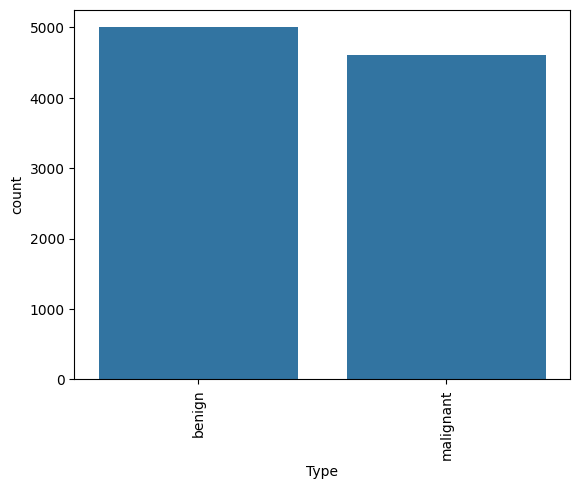

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

#Splitting the data set into 3 categories - training, validation and testing

In [12]:
train, test = train_test_split(data, test_size =0.25, random_state=42)

#Displaying a sample of the dataset

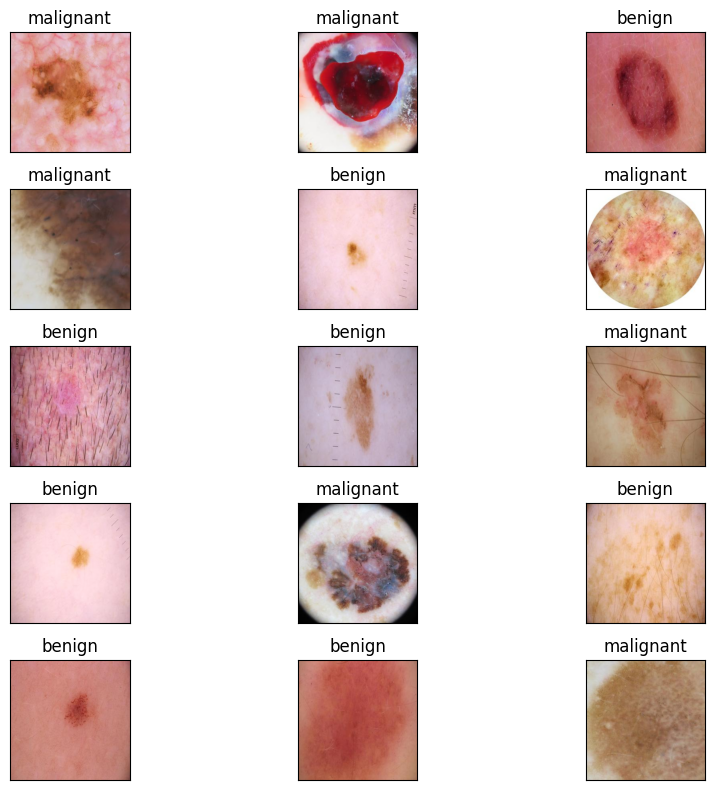

In [13]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(data.Filepath[i]))
  ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

#Data Preprocessing

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [15]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col = 'Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle = True,
    seed = 42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle = False,
    seed = 42
)
test_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle = False
)


Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


#Transfer Learning using ResNet50

In [16]:
pretrained_model=ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


#Adding new layers to ResNet50 and appending with the older layers

In [26]:
inputs = pretrained_model.input
x=Dense(128, activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

outputs = Dense(2,activation='softmax')(x)
model=Model(inputs=inputs, outputs=outputs)

In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Early Stopping is a condition to stop the training if the validation accuracy is not increasing after 2 epochs

In [28]:
my_callbacks = [EarlyStopping(monitor='val_accuracy',
                            min_delta=0,
                            patience=2,
                            mode='auto')]

In [29]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=10,
    callbacks = my_callbacks
)

Epoch 1/10
226/226 [==============================] - 1927s 9s/step - loss: 0.2634 - accuracy: 0.8909 - val_loss: 0.2187 - val_accuracy: 0.9113
Epoch 2/10
226/226 [==============================] - 41s 181ms/step - loss: 0.1929 - accuracy: 0.9221 - val_loss: 0.2219 - val_accuracy: 0.9105
Epoch 3/10
226/226 [==============================] - 41s 180ms/step - loss: 0.1614 - accuracy: 0.9368 - val_loss: 0.2090 - val_accuracy: 0.9180
Epoch 4/10
226/226 [==============================] - 41s 180ms/step - loss: 0.1459 - accuracy: 0.9406 - val_loss: 0.2064 - val_accuracy: 0.9238
Epoch 5/10
226/226 [==============================] - 40s 177ms/step - loss: 0.1228 - accuracy: 0.9528 - val_loss: 0.2272 - val_accuracy: 0.9172
Epoch 6/10
226/226 [==============================] - 40s 176ms/step - loss: 0.1137 - accuracy: 0.9570 - val_loss: 0.2201 - val_accuracy: 0.9180


#Saving the model to be used in future

In [37]:
model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Results of training the model using ResNet50

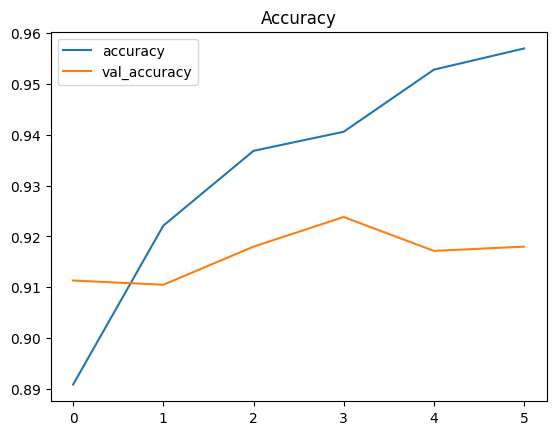

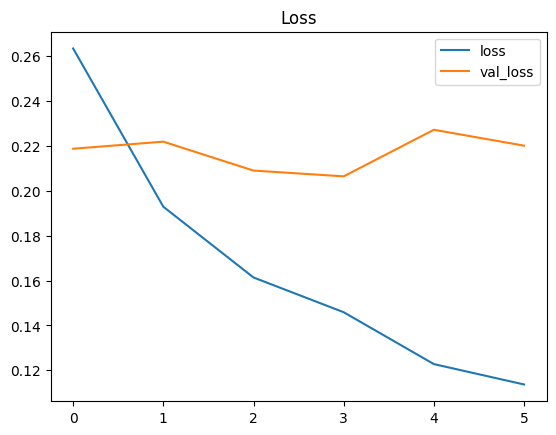

In [30]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [33]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss:{:.5f}%".format(results[0]*100))
print("Test Accuracy:{:.3f}%".format(results[1]*100))

Test Loss:22.01105%
Test Accuracy:91.799%


In [34]:
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

labels=train_gen.class_indices
labels = dict((v,k) for k,v in labels.items())
pred=[labels[k] for k in pred]

76/76 [==============================] - 11s 133ms/step


In [35]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.89      0.96      0.92      1241
   malignant       0.95      0.87      0.91      1161

    accuracy                           0.92      2402
   macro avg       0.92      0.92      0.92      2402
weighted avg       0.92      0.92      0.92      2402



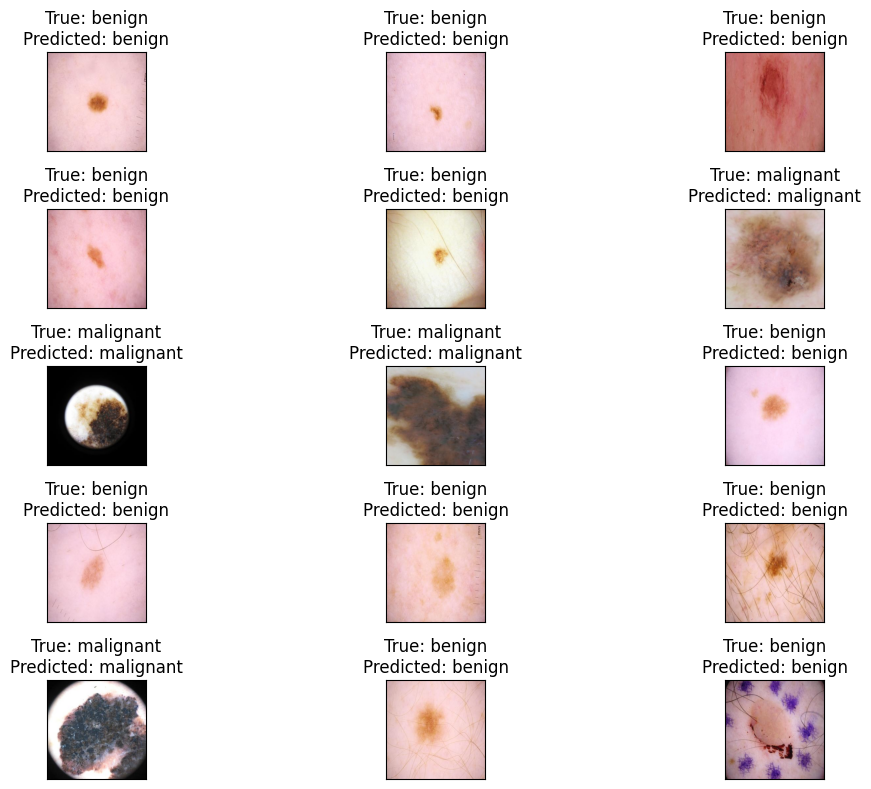

In [36]:
fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(12,8),
                         subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(test.Filepath.iloc[i]))
  ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [40]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model_resnet50.h5')

In [41]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [42]:
img_path = '/content/drive/MyDrive/SkinCancerBinary/melanoma_cancer_dataset/test/malignant/melanoma_10105.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(100,100))
x= np.expand_dims(img,axis=0)
x= preprocess_input(x)
result = new_model.predict(x)
prediction = name_class[np.argmax(result)]
print("The predicted class is: ",prediction)
print((result*100).astype('int'))#To check the percentage of match the image has with all the classes


1/1 [==============================] - 2s 2s/step
The predicted class is:  malignant
[[ 0 99]]
